In [118]:
import pandas as pd
import numpy as np


In [156]:
df = pd.read_csv('./survey.csv')
df.fillna('',inplace=True)
df.columns
    

Index(['Timestamp',
       'Have you experienced a natural disaster in your lifetime? What was it?',
       'If you experienced a disaster not listed above, please list it here.',
       'To what level have you prepared yourself for any disasters that might occur?',
       'How would you find out if you needed to evacuate for a natural disaster?',
       'Do you currently use an app to track possible natural disasters in your area? What is it?',
       'Rank what you expect to see (from first expected to least expected) when you log onto an app that will inform you about natural disasters. [First]',
       'Rank what you expect to see (from first expected to least expected) when you log onto an app that will inform you about natural disasters. [Second]',
       'Rank what you expect to see (from first expected to least expected) when you log onto an app that will inform you about natural disasters. [Third]',
       'Rank what you expect to see (from first expected to least expected) wh

In [157]:
responses = []
disasters = ['Droughts', 'Floods', 'Hurricanes', 'Tornadoes', 'Wildfires', 'Epidemic', 'Earthquake', 'Pandemic', 'Tsunami']
for n in range(df.shape[0]):
    disaster0 = df['Have you experienced a natural disaster in your lifetime? What was it?'][n]
    disaster0 += ' ' + df['If you experienced a disaster not listed above, please list it here.'][n]
    vals = []
    for disaster in disasters:
        if disaster.lower() in disaster0.lower():
            vals.append(1)
        else:
            vals.append(0)
    action0 = df
    responses.append({
        'Droughts':   vals[0],
        'Floods':     vals[1],
        'Hurricanes': vals[2],
        'Tornadoes':  vals[3],
        'Wildfires':  vals[4],
        'Epidemic':   vals[5] + vals[7],
        'Earthquake': vals[6],
        'Tsunami':    vals[8]
    })
disasters_df = pd.DataFrame(responses)
disasters_df

,Droughts,Floods,Hurricanes,Tornadoes,Wildfires,Epidemic,Earthquake,Tsunami
0,0,0,1,0,0,1,0,0
1,1,0,1,0,1,1,0,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0
4,0,1,1,0,0,0,0,0
5,0,1,0,0,0,1,0,0
6,0,0,0,0,0,1,1,0
7,0,1,0,0,0,1,1,0
8,0,0,0,0,1,0,0,0
9,0,0,0,0,0,1,1,0


In [158]:
disasters_df.corr()

,Droughts,Floods,Hurricanes,Tornadoes,Wildfires,Epidemic,Earthquake,Tsunami
Droughts,1.000000,-0.250000,3.779645e-01,-1.336306e-01,0.681385,0.250000,-0.218218,-0.071429
Floods,-0.250000,1.000000,1.889822e-01,2.004459e-01,-0.366900,0.071429,-0.218218,0.285714
Hurricanes,0.377964,0.188982,1.000000e+00,-1.962616e-17,0.138675,0.377964,-0.288675,-0.188982
Tornadoes,-0.133631,0.200446,-1.962616e-17,1.000000e+00,-0.196116,-0.200446,-0.068041,-0.133631
Wildfires,0.681385,-0.366900,1.386750e-01,-1.961161e-01,1.000000,-0.026207,-0.320256,-0.104828
Epidemic,0.250000,0.071429,3.779645e-01,-2.004459e-01,-0.026207,1.000000,0.218218,-0.285714
Earthquake,-0.218218,-0.218218,-2.886751e-01,-6.804138e-02,-0.320256,0.218218,1.000000,-0.218218
Tsunami,-0.071429,0.285714,-1.889822e-01,-1.336306e-01,-0.104828,-0.285714,-0.218218,1.000000


In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

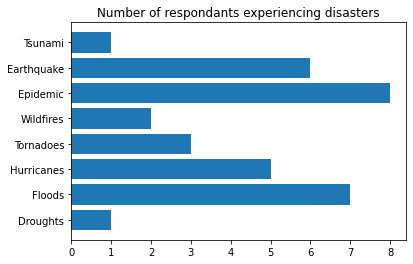

In [160]:
plt.barh(disasters_df.columns,disasters_df.sum());
plt.title('Number of respondants experiencing disasters');

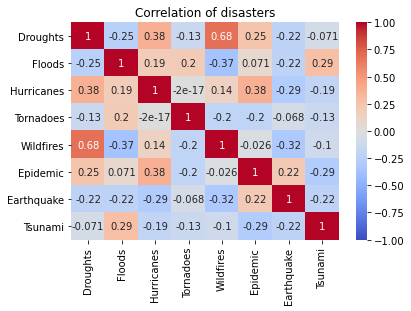

In [161]:
sns.heatmap(disasters_df.corr(),annot=True, vmin = -1, vmax = 1, cmap='coolwarm');
plt.title('Correlation of disasters');

In [162]:
df['To what level have you prepared yourself for any disasters that might occur?'][1]

'I have prepared a family & neighborhood emergency plan, I have prepared disaster survival kits'

In [163]:
responses = []
actions = ['I have collected the information',
           'I have prepared a family & neighborhood emergency plan',
           'I have prepared disaster survival kits',
           'I have signed up with entities that provide emergency news or alert systems',
           'I have taken special traning']
official = ['gov', 'emergency broadcast system', 'ebs', 'authorit', 'alert', 'notification']
news = ['tv', 't.v.', 'radio', 'new']
word_of_mouth = ['friend', 'famil', 'neighbor', 'word of mouth']
social_media = ['social media', 'facebook', 'twitter', 'internet']
for n in range(df.shape[0]):
    action0 = df['To what level have you prepared yourself for any disasters that might occur?'][n]
    source0 = df['How would you find out if you needed to evacuate for a natural disaster?'][n]
    apps0 = df['Do you currently use an app to track possible natural disasters in your area? What is it?'][n]
    vals = []
    for action in actions:
        if action in action0: 
            vals.append(1)
        else:
            vals.append(0)
    chk = 0
    for o in official:
        if o in source0: chk+=1
    vals.append(chk)
    chk = 0
    for o in news:
        if o in source0: chk+=1
    vals.append(chk)
    chk = 0
    for o in word_of_mouth:
        if o in source0: chk+=1
    vals.append(chk)
    chk = 0
    for o in social_media:
        if o in source0: chk+=1
    vals.append(chk)
    if (apps0.lower()=='no') or (apps0.lower()=='nope'): chk = 0
    elif 'weather' in apps0.lower(): chk = 2
    else: chk = 1
    vals.append(chk)
    
    responses.append({
        'collected info': vals[0],
        'prepared plan' : vals[1],
        'survival kits' : vals[2],
        'signed up for alerts': vals[3],
        'special training': vals[4],
        'official sources': vals[5],
        'tv & radio news': vals[6],
        'friends & family': vals[7],
        'social media': vals[8],
        'prior app use': vals[9]
    })
actions_df = pd.DataFrame(responses)
actions_df

,collected info,prepared plan,survival kits,signed up for alerts,special training,official sources,tv & radio news,friends & family,social media,prior app use
0,0,0,1,0,0,0,1,0,0,0
1,0,1,1,0,0,1,0,0,0,0
2,1,0,0,0,0,1,1,0,0,0
3,1,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,1
6,1,0,0,0,0,0,1,0,1,1
7,1,0,0,0,0,1,2,0,0,0
8,1,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0


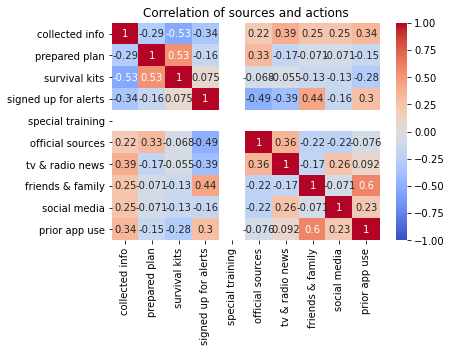

In [165]:
sns.heatmap(actions_df.corr(),annot=True, vmin = -1, vmax = 1, cmap='coolwarm');
plt.title('Correlation of sources and actions');

In [128]:
responses = []
ranks =['[First]',
        '[Second]',
        '[Third]',
        '[Fourth]',
        '[Fifth]']
infos= ['Your Location',
        'Description of disaster',
        'Distance/Time of traveling disaster',
        'Evacuation orders',
        'Warnings',
        'Other, tell us what it is below?']
for n in range(df.shape[0]):
    vals = []
    action1 = df['Rank what you expect to see (from first expected to least expected) when you log onto an app that will inform you about natural disasters. ' + ranks[0]][n]
    action2 = df['Rank what you expect to see (from first expected to least expected) when you log onto an app that will inform you about natural disasters. ' + ranks[1]][n]
    action3 = df['Rank what you expect to see (from first expected to least expected) when you log onto an app that will inform you about natural disasters. ' + ranks[2]][n]
    action4 = df['Rank what you expect to see (from first expected to least expected) when you log onto an app that will inform you about natural disasters. ' + ranks[3]][n]
    action5 = df['Rank what you expect to see (from first expected to least expected) when you log onto an app that will inform you about natural disasters. ' + ranks[4]][n]
    action6 = df['Anything else you want to add?'][n]
    for info in infos:
        if info in action1:
            vals.append(1)
        elif info in action2:
            vals.append(2)
        elif info in action3:
            vals.append(3)
        elif info in action4:
            vals.append(4)
        elif info in action5:
            vals.append(5)
        else:
            vals.append(np.nan)

    responses.append({
        'location': vals[0],
        'description' : vals[1],
        'path' : vals[2],
        'evac orders': vals[3],
        'warnings': vals[4],
        'other': vals[5]
    })
    
rankings_df = pd.DataFrame(responses)
rankings_df



,location,description,path,evac orders,warnings,other
0,1.0,4.0,5.0,2.0,3.0,NaN
1,5.0,1.0,4.0,3.0,2.0,NaN
2,1.0,2.0,3.0,1.0,2.0,NaN
3,1.0,2.0,3.0,4.0,1.0,NaN
4,3.0,4.0,5.0,1.0,2.0,NaN
5,3.0,1.0,2.0,NaN,NaN,NaN
6,2.0,4.0,3.0,5.0,1.0,NaN
7,1.0,1.0,1.0,1.0,1.0,NaN
8,5.0,2.0,3.0,4.0,1.0,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
rankings_df.mean()

location       2.461538
description    2.642857
path           3.285714
evac orders    2.538462
warnings       1.846154
other          5.000000
dtype: float64

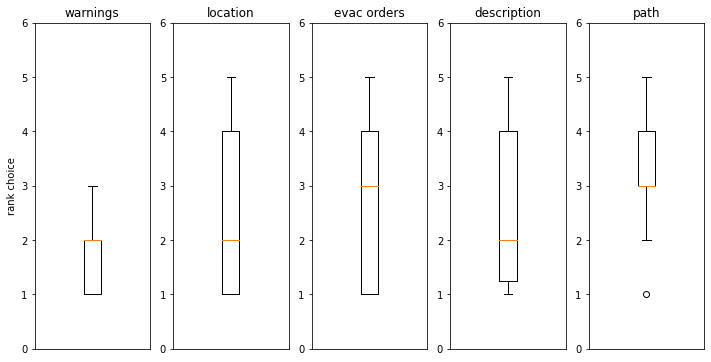

In [130]:
fig = plt.figure(figsize=(12,6));
ax = fig.add_subplot(151);
plt.boxplot(rankings_df['warnings'].dropna());
plt.title('warnings'); 
plt.ylabel('rank choice');
plt.xticks([]);
plt.ylim([0,6]);
ax = fig.add_subplot(152);
plt.boxplot(rankings_df['location'].dropna());
plt.title('location');
plt.xticks([]);
plt.ylim([0,6]);
ax = fig.add_subplot(153);
plt.boxplot(rankings_df['evac orders'].dropna());
plt.title('evac orders');
plt.xticks([]);
plt.ylim([0,6]);
ax = fig.add_subplot(154);
plt.boxplot(rankings_df['description'].dropna());
plt.title('description');
plt.xticks([]);
plt.ylim([0,6]);
ax = fig.add_subplot(155);
plt.boxplot(rankings_df['path'].dropna());
plt.title('path');
plt.xticks([]);
plt.ylim([0,6]);





In [131]:
df2 = pd.read_csv('./interviews.csv')
df2 = df2[['Notes']]
df2 = df2.dropna()
df2

,Notes
0,"Snow storm warning,"
1,Don’t know when they sent you alarm: not signe...
3,Have experienced the wildfires
4,"Smell the fire, air quality was concerned abou..."
5,To keep kids inside and limit time outside don...
6,Have never regularly looked at air quality.
8,"Exploring what the problem, through the news a..."
9,How dangerous is the fire for me and my family.
11,Eg the fire is Santa Monica and she was in Man...
12,Internal battle of should I stay or should I g...


In [132]:
from sklearn.feature_extraction.text import CountVectorizer


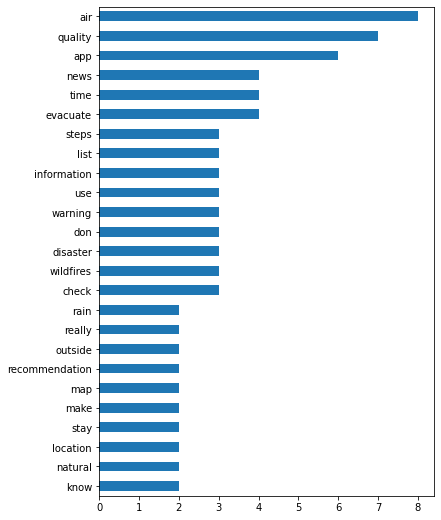

In [133]:
cvec = CountVectorizer(stop_words='english')
X = df2['Notes']
cvec.fit(X)
X_cv = cvec.transform(X)
words = pd.DataFrame(X_cv.todense(),columns= cvec.get_feature_names())
fig = plt.figure(figsize=(6,9));
words.sum().sort_values(ascending = True).tail(25).plot(kind='barh');

In [135]:
new_cols = actions_df.columns
for col in new_cols:
    disasters_df[col] = actions_df[col]
new_cols = rankings_df.columns
for col in new_cols:
    disasters_df[col] = rankings_df[col]
disasters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Droughts              15 non-null     int64  
 1   Floods                15 non-null     int64  
 2   Hurricanes            15 non-null     int64  
 3   Tornadoes             15 non-null     int64  
 4   Wildfires             15 non-null     int64  
 5   Epidemic              15 non-null     int64  
 6   Earthquake            15 non-null     int64  
 7   Tsunami               15 non-null     int64  
 8   collected info        15 non-null     int64  
 9   prepared plan         15 non-null     int64  
 10  survival kits         15 non-null     int64  
 11  signed up for alerts  15 non-null     int64  
 12  special training      15 non-null     int64  
 13  official sources      15 non-null     int64  
 14  tv & radio news       15 non-null     int64  
 15  friends & family      15 

In [136]:
disasters_df

,Droughts,Floods,Hurricanes,Tornadoes,Wildfires,Epidemic,Earthquake,Tsunami,collected info,prepared plan,...,tv & radio news,friends & family,social media,prior app use,location,description,path,evac orders,warnings,other
0,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,1.0,4.0,5.0,2.0,3.0,NaN
1,1,0,1,0,1,1,0,0,0,1,...,0,0,0,0,5.0,1.0,4.0,3.0,2.0,NaN
2,0,0,0,0,0,0,1,0,1,0,...,1,0,0,0,1.0,2.0,3.0,1.0,2.0,NaN
3,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1.0,2.0,3.0,4.0,1.0,NaN
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,3.0,4.0,5.0,1.0,2.0,NaN
5,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,3.0,1.0,2.0,NaN,NaN,NaN
6,0,0,0,0,0,1,1,0,1,0,...,1,0,1,1,2.0,4.0,3.0,5.0,1.0,NaN
7,0,1,0,0,0,1,1,0,1,0,...,2,0,0,0,1.0,1.0,1.0,1.0,1.0,NaN
8,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,5.0,2.0,3.0,4.0,1.0,NaN
9,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


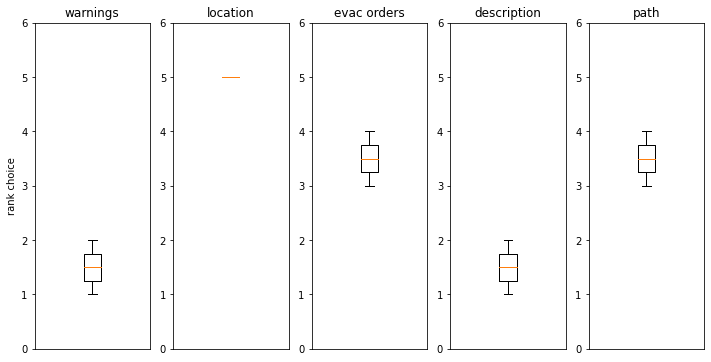

In [137]:
chk = disasters_df[disasters_df['Wildfires']==1]

fig = plt.figure(figsize=(12,6));
ax = fig.add_subplot(151);
plt.boxplot(chk['warnings'].dropna());
plt.title('warnings'); 
plt.ylabel('rank choice');
plt.xticks([]);
plt.ylim([0,6]);
ax = fig.add_subplot(152);
plt.boxplot(chk['location'].dropna());
plt.title('location');
plt.xticks([]);
plt.ylim([0,6]);
ax = fig.add_subplot(153);
plt.boxplot(chk['evac orders'].dropna());
plt.title('evac orders');
plt.xticks([]);
plt.ylim([0,6]);
ax = fig.add_subplot(154);
plt.boxplot(chk['description'].dropna());
plt.title('description');
plt.xticks([]);
plt.ylim([0,6]);
ax = fig.add_subplot(155);
plt.boxplot(chk['path'].dropna());
plt.title('path');
plt.xticks([]);
plt.ylim([0,6]);


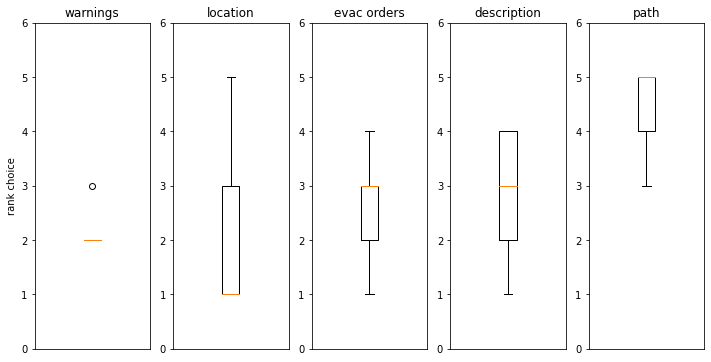

In [138]:
chk = disasters_df[disasters_df['Hurricanes']==1]

fig = plt.figure(figsize=(12,6));
ax = fig.add_subplot(151);
plt.boxplot(chk['warnings'].dropna());
plt.title('warnings'); 
plt.ylabel('rank choice');
plt.xticks([]);
plt.ylim([0,6]);
ax = fig.add_subplot(152);
plt.boxplot(chk['location'].dropna());
plt.title('location');
plt.xticks([]);
plt.ylim([0,6]);
ax = fig.add_subplot(153);
plt.boxplot(chk['evac orders'].dropna());
plt.title('evac orders');
plt.xticks([]);
plt.ylim([0,6]);
ax = fig.add_subplot(154);
plt.boxplot(chk['description'].dropna());
plt.title('description');
plt.xticks([]);
plt.ylim([0,6]);
ax = fig.add_subplot(155);
plt.boxplot(chk['path'].dropna());
plt.title('path');
plt.xticks([]);
plt.ylim([0,6]);


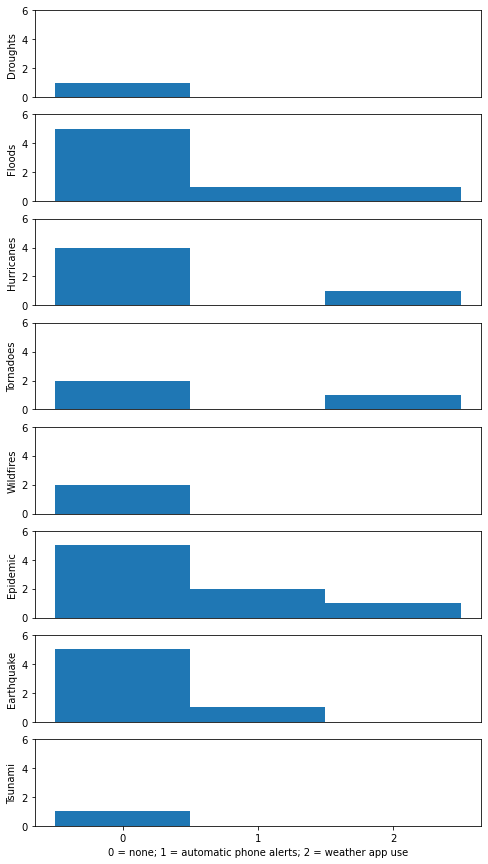

In [154]:
bins = [-0.5, 0.5, 1.5, 2.5]
fig = plt.figure(figsize=(8,15));
ax = fig.add_subplot(811);
chk = disasters_df[disasters_df['Droughts']==1]
plt.hist(chk['prior app use'],bins);
plt.ylabel('Droughts');
plt.xticks([]);
plt.ylim([0, 6]);
ax = fig.add_subplot(812);
chk = disasters_df[disasters_df['Floods']==1]
plt.hist(chk['prior app use'],bins);
plt.ylabel('Floods');
plt.xticks([]);
plt.ylim([0, 6]);
ax = fig.add_subplot(813);
chk = disasters_df[disasters_df['Hurricanes']==1]
plt.hist(chk['prior app use'],bins);
plt.ylabel('Hurricanes');
plt.xticks([]);
plt.ylim([0, 6]);
ax = fig.add_subplot(814);
chk = disasters_df[disasters_df['Tornadoes']==1]
plt.hist(chk['prior app use'],bins);
plt.ylabel('Tornadoes');
plt.xticks([]);
plt.ylim([0, 6]);
ax = fig.add_subplot(815);
chk = disasters_df[disasters_df['Wildfires']==1]
plt.hist(chk['prior app use'],bins);
plt.ylabel('Wildfires');
plt.xticks([]);
plt.ylim([0, 6]);
ax = fig.add_subplot(816);
chk = disasters_df[disasters_df['Epidemic']==1]
plt.hist(chk['prior app use'],bins);
plt.ylabel('Epidemic');
plt.xticks([]);
plt.ylim([0, 6]);
ax = fig.add_subplot(817);
chk = disasters_df[disasters_df['Earthquake']==1]
plt.hist(chk['prior app use'],bins);
plt.ylabel('Earthquake');
plt.xticks([]);
plt.ylim([0, 6]);
ax = fig.add_subplot(818);
chk = disasters_df[disasters_df['Tsunami']==1]
plt.hist(chk['prior app use'],bins);
plt.ylabel('Tsunami');
plt.xticks([0, 1, 2]);
plt.xlabel('0 = none; 1 = automatic phone alerts; 2 = weather app use');
plt.ylim([0, 6]);
